## KAGGLE BIKE SHARE CHALLENGE - Exploratory Data Analysis (EDA)

For TpT Interview Assignment - June 2017

By: Divya Sriram

Kaggle Username: divyasriram

----------------

** For my reference: About the data set + Capital Bike Share Program: https://www.capitalbikeshare.com/**

-- 2011 to 2012

-- train set: 10886 data points (rows)

-- train set: includes 3 extra columsn (casual - nonmembers, registered - members, count)

-- test set: 6493 data points (rows)
 


-- can rent for 24 hours

** For my reference: Variables **
    
(1) datetime - hourly date + timestamp  

(2) season 1 = spring, 2 = summer, 3 = fall, 4 = winter (??questionable)

(3) holiday - whether the day is considered a holiday

0 = not a holiday, 1 = holiday

(4) workingday - whether the day is neither a weekend nor holiday

1 = workday, 0 = holiday/weekend

(5) weather:

1: Clear, 2: Mist, 3: Light Snow, Light Rain , 4: Heavy Rain

(6) temp - temperature in Celsius

(7) atemp - "feels like" temperature in Celsius

(8) humidity - relative humidity

(9) windspeed - wind speed

(10) casual - number of non-registered user rentals initiated

(11) registered - number of registered user rentals initiated

(12) count - number of total rentals

(13) dayofweek - The day of the week with Monday=0, Sunday=6

------------------------

------------------------

## The More I Look at the Data, The More Questions I Have!

(1) Where is the weather information coming from? I'm **assuming** a credible source, but what if it's not?

(2) Why did they choose to divide the train and test set in that way (first 2/3 of the month and last 1/3 of the month)?

(3) According to this data set, season 1 = spring, which according to the data set, contains the months of January through March. And summer is season 2, months of April - June, fall is season 3, months of July - Sept, and winter is season 4, October - December. Am I the only one that thinks this categorization is incorrect??

According to https://www.nationalgeographic.org/encyclopedia/season/ (a source most would consider credible), the division of the seasons for this data set is incorrect.

(4) Why did they choose to not include a categorical variable for biking events in the area during that hour/day? This seems like an important factor in influencing the # of bike rentals.

## Assumptions We're Making / Biases!

There are over hundreds of assumptions made in every model, it is innately how the world of 'classification' curses the field of data science. But it's better to be aware of these assumptions and work towards acknowleding and later correcting them. Here are a few of the many assumptions with our training and test set data/model.

(1) What if our training model takes into account only locals? And it happens to be that the test set (later 1/3 of the month) contains more holidays or people take more days off --> this would increase potential visitors and tourists who might be more likely to rent a bike no matter the weather because it's their only chance.

(2) If more bikes are rented when there is a bike event in the area (an assumption to prove an assumption, I know) then the way we have split our training and test set assumes that bike events are equally likely to happen in either part of the month.

-----------------

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns


In [3]:
# Read in training and dev data sets
train = pd.read_csv('../TpT-BikeShareKaggle/Orig_Data_Files/train.csv')
test = pd.read_csv('../TpT-BikeShareKaggle/Orig_Data_Files/test.csv')

In [4]:
print train.shape
print test.shape

(10886, 12)
(6493, 9)


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
#create new data frames and keep original train and test sets intact for reference

train_data = train
test_data = test

#separating train_data datetimes into year, month, day, hour
train_data["datetime"] = pd.to_datetime(train_data["datetime"])
train_data["year"] = train_data["datetime"].dt.year
train_data["month"] = train_data["datetime"].dt.month
train_data["day"] = train_data["datetime"].dt.day
train_data["hour"] = train_data["datetime"].dt.hour
train_data["dayofweek"]= train_data["datetime"].dt.dayofweek

#separating test_data datetimes into year, month, day, hour
test_data["datetime"] = pd.to_datetime(test_data["datetime"])
test_data["year"] = test_data["datetime"].dt.year
test_data["month"] = test_data["datetime"].dt.month
test_data["day"] = test_data["datetime"].dt.day
test_data["hour"] = test_data["datetime"].dt.hour
test_data["dayofweek"]= test_data["datetime"].dt.dayofweek


#### Changing Seasons

I was not pleased with the way the months were divided into seasons, they were not correct. My guess is that this will affect the way the months correspond to the seasons, and how they correspond to temp, etc. So let's regroup to the correct seasons.

Seasons + months were grouped according to https://www.timeanddate.com/calendar/aboutseasons.html

Remember:

Season 1 = Spring
Season 2 = Summer
Season 3 = Fall
Season 4 = Winter

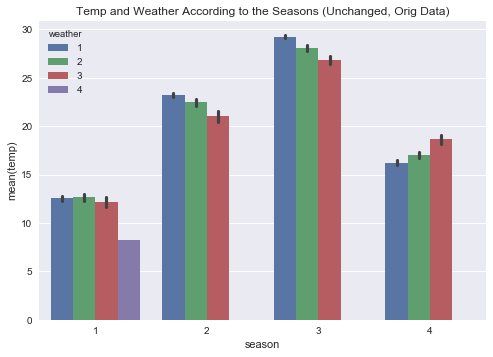

In [7]:
#unchanged seasons
sns.barplot(x="season", y = 'temp', hue="weather", data=train_data);
plt.title('Temp and Weather According to the Seasons (Unchanged, Orig Data)')

Why is Season 3 (Fall) the hottest? And is it not highly unlikely for weather 4 (worst weather) to happen in during Season 1 (Spring)?


And the temperature trend moves from :

coldest --> warmer --> hottest --> cooling down (spring --> summer --> fall --> winter)

^That's weird!

In [8]:
# if more time: create a function to automate this


### CHANGING SEASON DATA FOR TRAIN_DATA #####

#setting spring to mar 20 - jun 20 (season = 1)
spring = (((train_data['datetime'] >= '2011-3-20')& (train_data['datetime'] < '2011-6-21')) | ((train_data['datetime'] >= '2012-3-20') & (train_data['datetime'] < '2012-6-21')))
train_data.loc[spring, 'season'] = 1   

#setting summer to jun 21 - sep 22 (season = 2)
summer = (((train_data['datetime'] >= '2011-6-21')& (train_data['datetime'] < '2011-9-23')) | ((train_data['datetime'] >= '2012-6-21') & (train_data['datetime'] < '2012-9-23')))
train_data.loc[summer, 'season'] = 2   


#setting fall to sep 23 - dec 21 (season = 3)
fall = (((train_data['datetime'] >= '2011-9-23')& (train_data['datetime'] < '2011-12-22')) | ((train_data['datetime'] >= '2012-9-23') & (train_data['datetime'] < '2012-12-22')))
train_data.loc[fall, 'season'] = 3   


#setting winter to dec 22 - mar 19 (season = 4)
winter = (((train_data['datetime'] >= '2011-01-01')& (train_data['datetime'] < '2011-3-20')) | ((train_data['datetime'] >= '2011-12-22')& (train_data['datetime'] < '2012-3-20')) | ((train_data['datetime'] >= '2012-12-22') & (train_data['datetime'] <= '2012-12-31')))
train_data.loc[winter, 'season'] = 4   




### CHANGING SEASON DATA FOR TEST_DATA #####

#setting spring to mar 20 - jun 20 (season = 1)
spring = (((test_data['datetime'] >= '2011-3-20')& (test_data['datetime'] < '2011-6-21')) | ((test_data['datetime'] >= '2012-3-20') & (test_data['datetime'] < '2012-6-21')))
test_data.loc[spring, 'season'] = 1   

#setting summer to jun 21 - sep 22 (season = 2)
summer = (((test_data['datetime'] >= '2011-6-21')& (test_data['datetime'] < '2011-9-23')) | ((test_data['datetime'] >= '2012-6-21') & (test_data['datetime'] < '2012-9-23')))
test_data.loc[summer, 'season'] = 2   


#setting fall to sep 23 - dec 21 (season = 3)
fall = (((test_data['datetime'] >= '2011-9-23')& (test_data['datetime'] < '2011-12-22')) | ((test_data['datetime'] >= '2012-9-23') & (test_data['datetime'] < '2012-12-22')))
test_data.loc[fall, 'season'] = 3   


#setting winter to dec 22 - mar 19 (season = 4)
winter = (((test_data['datetime'] >= '2011-01-01')& (test_data['datetime'] < '2011-3-20')) | ((test_data['datetime'] >= '2011-12-22')& (test_data['datetime'] < '2012-3-20')) | ((test_data['datetime'] >= '2012-12-22') & (test_data['datetime'] <= '2012-12-31')))
test_data.loc[winter, 'season'] = 4   



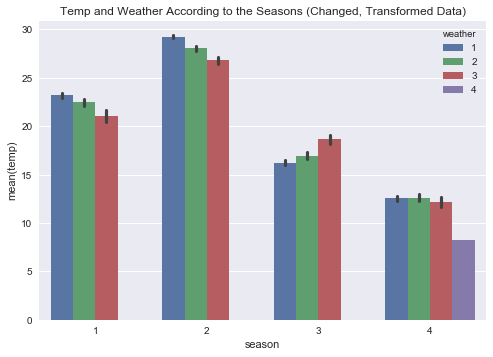

In [9]:
#changed seasons
sns.barplot(x="season", y = 'temp', hue="weather", data=train_data);
plt.title('Temp and Weather According to the Seasons (Changed, Transformed Data)')

Compare the first barplot with unchanged seasons (labeled "Temp and Weather According to the Seasons (Unchanged, Orig Data)") to the second barplot with changed seasons (labeled "Temp and Weather According to the Seasons (Changed, Transformed Data)").

This data makes much more sense to me. Season 2 (Summer) is the hotest overall, and the worst weather, weather 4, happens during Season 4 (Winter). 


And the temperature trend moves from :

warm --> hottest --> cooling down --> coldest (spring --> summer --> fall --> winter)


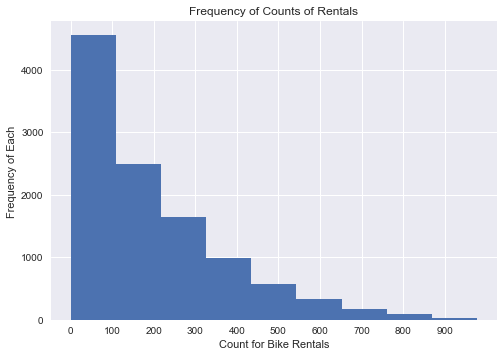

In [10]:
num_bins = 10 # <-- Change here - Specify total number of bins for histogram
plt.hist(train_data['count'], bins=np.linspace(np.min(train_data['count']), np.max(train_data['count']), num=num_bins)) 
xrange = range(0,1000,100)
plt.xticks(xrange)
plt.xlabel('Count for Bike Rentals')
plt.ylabel('Frequency of Each ')
plt.title('Frequency of Counts of Rentals')
plt.show()

Looks like majority of the records seem to have 0-200ish rentals per hour and much less have 700+. This is what I was expecting.

In [398]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.004501,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,3.013963
std,1.225768,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,1.000000
50%,2.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,6.000000


Let's take a quick look at how the data looks. I usually scan to check for obvious signs of missing data, gaps in the data, etc.


In this case, because our various elements of data are with reference to each hour of the day, it's important to check and see if we have repeated hours or missing hours.

In [237]:
train_data.isnull().values.any()

False

No missing column values.

In [242]:
#train_data.duplicated('datetime')
train_data.groupby('datetime')['hour'].value_counts()

datetime             hour
2011-01-01 00:00:00  0       1
2011-01-01 01:00:00  1       1
2011-01-01 02:00:00  2       1
2011-01-01 03:00:00  3       1
2011-01-01 04:00:00  4       1
2011-01-01 05:00:00  5       1
2011-01-01 06:00:00  6       1
2011-01-01 07:00:00  7       1
2011-01-01 08:00:00  8       1
2011-01-01 09:00:00  9       1
2011-01-01 10:00:00  10      1
2011-01-01 11:00:00  11      1
2011-01-01 12:00:00  12      1
2011-01-01 13:00:00  13      1
2011-01-01 14:00:00  14      1
2011-01-01 15:00:00  15      1
2011-01-01 16:00:00  16      1
2011-01-01 17:00:00  17      1
2011-01-01 18:00:00  18      1
2011-01-01 19:00:00  19      1
2011-01-01 20:00:00  20      1
2011-01-01 21:00:00  21      1
2011-01-01 22:00:00  22      1
2011-01-01 23:00:00  23      1
2011-01-02 00:00:00  0       1
2011-01-02 01:00:00  1       1
2011-01-02 02:00:00  2       1
2011-01-02 03:00:00  3       1
2011-01-02 04:00:00  4       1
2011-01-02 06:00:00  6       1
                            ..
2012-12-18 18

No repeated hours. (Because original data frame has 10886 entries and a groupby by hour of each day gave us same number. Repeats would have given us a lower number.)

In [307]:
train_data.head(75)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9,5


Things to note:

(1) This sample of 50 rows of data already reveals gaps in the data (missing certain hours of certain days). But, for the rows(hours) we have, all the associated columns have data (none are NaN).

Note for example:
January 3rd of 2011 has data for the 1st, 2nd, 5th hour, etc. However it is missing hour 3 and 4.


(2) People rent bikes at odd hours...

I was deciding whether to fill in those missing hours (0 rentals) or to leave the training set with missing hours. I was expecting that maybe the missing hours are 12am-6am or so but it looks like people rent at those hours as well. Interesting...let's do a binning for these hours to see if there's a spread in time of day

(3) I am leaving the training set as is (with the missing hours) because:

-> I am unsure as to why those hours are missing

-> To assume that they had 0 rentals could be incorrect

-> Hours could have not been recorded due to some error in the system

-> I have no way of tracking the other elements of data (other column variables) so I can't fill that data in

I do not want to introduce my own bias/assumptions into this data set by filling in the missing records (hours). If the data set was sparse and had fewer variables (columns) and fewer records, the need to fill in the missing values might be more important.

In [11]:
# take note there are over 1,000 records with windspeed of 0
train_data.loc[train_data['windspeed']== min(train_data['windspeed'])]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5
6,2011-01-01 06:00:00,4,0,0,1,9.02,13.635,80,0.0,2,0,2,2011,1,1,6,5
7,2011-01-01 07:00:00,4,0,0,1,8.20,12.880,86,0.0,1,2,3,2011,1,1,7,5
8,2011-01-01 08:00:00,4,0,0,1,9.84,14.395,75,0.0,1,7,8,2011,1,1,8,5
9,2011-01-01 09:00:00,4,0,0,1,13.12,17.425,76,0.0,8,6,14,2011,1,1,9,5
64,2011-01-03 19:00:00,4,0,1,1,8.20,12.880,47,0.0,8,102,110,2011,1,3,19,0


Highly unlikely for windspeed to be 0 (in fact I think theoretically, it's impossible). I could build some prediction model to predict likely windspeeds according to the trends in the data and fill in these 0's but for now, I'm going to leave it as is (leaving it as is will likely add more error to my model). 

In [104]:
train_data['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [110]:
train_data.month.value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

With the exception of the month of January, all the other months have around similar entries for each month. This is important for training our model later because a significantly higher skew towards frequency of one month of the other could influence the model differently. (Note to self: like Airbnb model and NDF).

In [115]:
train_data.day.value_counts()

1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: day, dtype: int64

Along the same lines of checking the distribution of entries for each month, the entries for each day is just as important in reference to training our model.

In [247]:
train_data.groupby('hour')['hour'].value_counts()

hour  hour
0     0       455
1     1       454
2     2       448
3     3       433
4     4       442
5     5       452
6     6       455
7     7       455
8     8       455
9     9       455
10    10      455
11    11      455
12    12      456
13    13      456
14    14      456
15    15      456
16    16      456
17    17      456
18    18      456
19    19      456
20    20      456
21    21      456
22    22      456
23    23      456
Name: hour, dtype: int64

Last but not least, distribution of records by the hour is most crucial as we are determining our output variable based on this. 

In the cell below, we can see just from hour 0 that there are many people are renting bikes from 12am-1am in the morning. One hypothesis is that this bike share can be kept over night, so maybe people forgot to return them or are keeping them to use for the later part of the morning?

So it is possible to rent the bike for 24 hours: https://www.capitalbikeshare.com/

In [174]:
train_data.groupby('hour')['count'].value_counts()

hour  count
0     31       12
      39       12
      17       11
      23       10
      34       10
      15        9
      25        9
      47        9
      24        8
      37        8
      43        8
      53        8
      14        7
      16        7
      29        7
      33        7
      35        7
      38        7
      13        6
      21        6
      22        6
      28        6
      30        6
      41        6
      48        6
      8         5
      20        5
      26        5
      27        5
      32        5
               ..
23    161       1
      163       1
      164       1
      168       1
      169       1
      170       1
      172       1
      174       1
      176       1
      178       1
      179       1
      180       1
      185       1
      186       1
      192       1
      195       1
      198       1
      199       1
      205       1
      212       1
      215       1
      220       1
      226       1
      229       

In [48]:
train_data['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [16]:
train_data.groupby('hour')['count'].mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

In [49]:
train_data.loc[train['count'] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
30,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1,2011,1,2,7
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,2011,1,3,4
71,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,1,2011,1,4,2
118,2011-01-06 04:00:00,1,0,1,2,6.56,9.850,64,6.0032,0,1,1,2011,1,6,4
140,2011-01-07 02:00:00,1,0,1,2,8.20,9.850,69,15.0013,0,1,1,2011,1,7,2
141,2011-01-07 04:00:00,1,0,1,2,8.20,10.605,69,8.9981,0,1,1,2011,1,7,4
165,2011-01-08 04:00:00,1,0,0,3,7.38,9.850,55,11.0014,0,1,1,2011,1,8,4
189,2011-01-09 04:00:00,1,0,0,1,3.28,4.545,53,12.9980,0,1,1,2011,1,9,4


In [37]:
X =[1]
train_data[train_data['count'].isin(X)].groupby('hour')['count'].value_counts()

hour  count
1     1         4
2     1        15
3     1        28
4     1        45
5     1         9
6     1         3
7     1         1
Name: count, dtype: int64

Looking at all the rows that have 1 rental for that hour, it seems like they generally occur in the wee hours of the morning (12am-7am)

In [12]:
#max count = 977
#when does max rentals in an hour happen?

train_data.loc[train_data['count']== max(train_data['count'])]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
9345,2012-09-12 18:00:00,2,0,1,1,27.06,31.06,44,16.9979,91,886,977,2012,9,12,18,2


The most amount of rentals made was September 12, 2012 from 6-7pm. That's almost 1000 people that all rented during this hour. Let's do a little google to see if some event was happening during Sept 12, 2012.

According to this flyer: http://dcbikeparty.com/wp-content/uploads/2012/09/DCBP-Press-Release-September-Ride.pdf and some other  articles, there was a DC Bike Party that occured with a meet up time of 7:30pm - so this aligns as a possible reason as to this huge spike in bike shares at this time during this day!

----------------------------

## Sanity Checks - Does the data points make sense with respect to each other ?

In [429]:
# if it's a holiday, it's can't be a workingday
train_data.loc[(train_data['holiday'] == 1) & (train_data['workingday'] == 1)] 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek


In [430]:
#if it's not a holiday, and not the weekend, it has to be a workday
train_data.loc[(train_data['holiday'] == 0) & (train_data['dayofweek'] != 5) & (train_data['dayofweek'] != 6) & (train_data['workingday'] == 0)] 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek


Graphs + plots (throughout this document) also show trends of rentals being greater during nice weather. This allows me to know that I'm working with a dataset that represents most human beings that want to make bike share rentals in sane weather.

----------------------

## Looking at relationships between variables

Because some of our data columns are numerical, we can run some correlations to give us an idea of how these variables are associated (if they are) with each other - paying close attention to the relationship between each variable and count, our predictor variable. This will help is having a vague idea of what factors to include in our machine learning models later.

**Some columns, example: seasons, have numerical values but are actually categorical, not continuous numerical variables. **

In [13]:
train_data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
season,1.000000,0.018034,-0.008712,0.017245,-0.615315,-0.614554,-0.066193,0.051914,-0.266689,-0.156253,-0.203838,0.004961,-0.187718,-0.002120,0.006367,0.006117
holiday,0.018034,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.191832
workingday,-0.008712,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.704267
weather,0.017245,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.047692
temp,-0.615315,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,-0.038466
atemp,-0.614554,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,-0.040235
humidity,-0.066193,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.026507
windspeed,0.051914,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.024804
casual,-0.266689,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.246959
registered,-0.156253,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.084427


(ignoring casual and registered and categorical) 

The variables with the highest correlation to count are **hour**, **temp**, **atemp**, and **humidity**, around **0.40**, **0.39**, **0.39**, and **-0.32** respectively. 

Temp and atemp are highly correlated (reasonably so) - so if these are variables of influence in the machine learning model, I might only include one or the other, to keep a simpler model (fewer variables, Occam's razor). I think it makes more sense to use temp instead of atemp because I'm not sure how atemp is measured, but I'm assuming temp is measured on a strict scale with greater accuracy/precision.

It is interesting that month and day don't have much, if any, correlation with bike rentals. Though I was most surprised that day didn't have any correlation (0.02) to count, this could be beneficial because I was worried that the test set consists of the last 1/3 of the month which could be drastically different and influence value counts than the first 2/3 of the month (like that of the training set) but the lack of correlation between days and counts in the training set is in some way reassuring.

The day of week has a 0.25 correlation value to casual rentals but not to the overall count.

Seaborn has an augmented version of a scatterplot, a joint plot, that shows how correlated the two variables are, as well as the individual distributions of each.

Pearson r = correlation coefficient between the two variables

#### Relationship Between Hour and Count

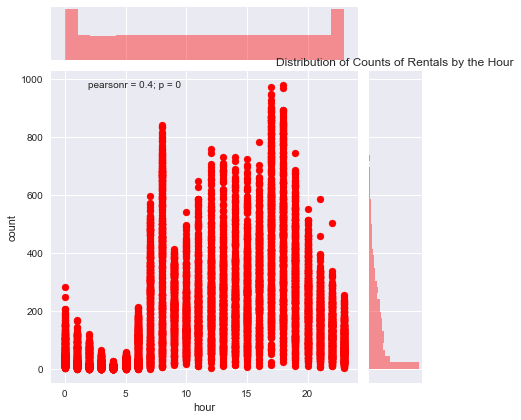

In [14]:
data = pd.DataFrame({"hour": train_data['hour'], "count": train_data['count']})
sns.jointplot(x="hour", y="count", data=data, color='r')

plt.title('Distribution of Counts of Rentals by the Hour')

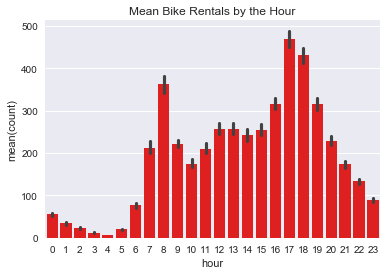

In [489]:
sns.barplot(x="hour", y = 'count', data=train_data, color = 'r');
plt.title('Mean Bike Rentals by the Hour')

The correlation matrix showed a value of 0.4 between hour and counts and these graphs seem to display that as well. As most would expect, the mean # of rentals during odd hours are fewer than that of day time hours.

It does concern me though that in the first of these plots above, there is a greater frequency of occurances (occurance of the hour being recorded itself) for the odd hours as opposed to the central day time hours.

#### Relationship Between Month and Count

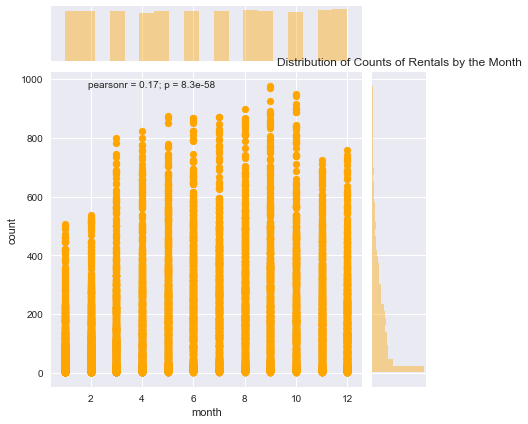

In [34]:
data = pd.DataFrame({"month": train_data['month'], "count": train_data['count']})
sns.jointplot(x="month", y="count", data=data, color='orange')

plt.title('Distribution of Counts of Rentals by the Month')

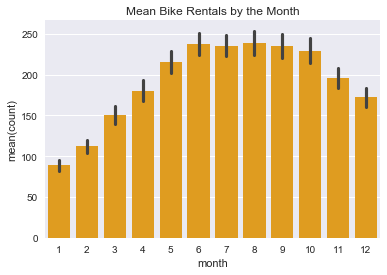

In [35]:
sns.barplot(x="month", y = 'count', data=train_data, color = 'orange');
plt.title('Mean Bike Rentals by the Month')

#### Relationship Between Day of the Month and Count

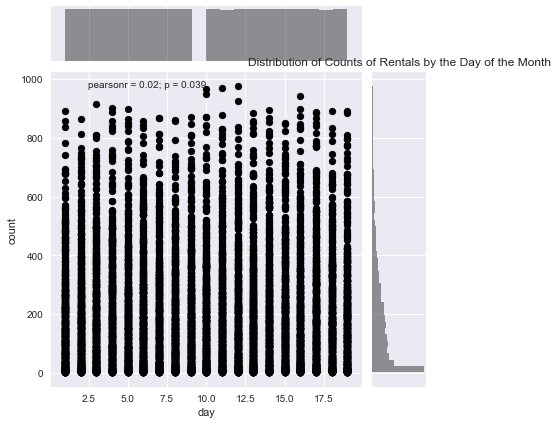

In [466]:
data = pd.DataFrame({"day": train_data['day'], "count": train_data['count']})
sns.jointplot(x="day", y="count", data=data, color='black')
plt.title('Distribution of Counts of Rentals by the Day of the Month')

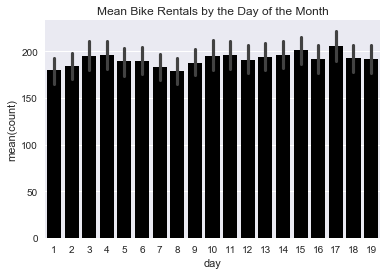

In [490]:
sns.barplot(x="day", y = 'count', data=train_data, color = 'black');
plt.title('Mean Bike Rentals by the Day of the Month')

Like I said earlier: I was worried that the test set consists of the last 1/3 of the month which could be drastically different and influence value counts than the first 2/3 of the month (like that of the training set) but the lack of significant correlation between days of the month and counts (0.02) in the training set is in some way reassuring.

#### Relationship Between Day of the Week and Count

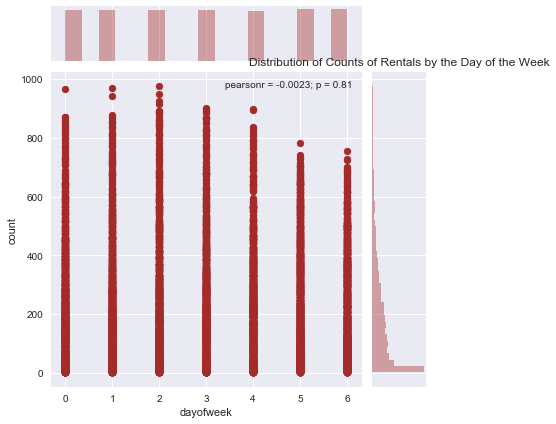

In [457]:
data = pd.DataFrame({"dayofweek": train_data['dayofweek'], "count": train_data['count']})
sns.jointplot(x="dayofweek", y="count", data=data, color='brown')
plt.title('Distribution of Counts of Rentals by the Day of the Week')

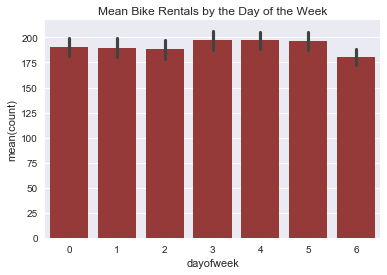

In [492]:
sns.barplot(x="dayofweek", y = 'count', data=train_data, color = 'brown');
plt.title('Mean Bike Rentals by the Day of the Week')

The actual value for correlation between day of week and count is very very small (-0.002).

But Sunday looks like the day least likely to have a large group of rentals at one hour, and in general has a slightly lower average rental count.

#### Relationship Between Temperature and Count

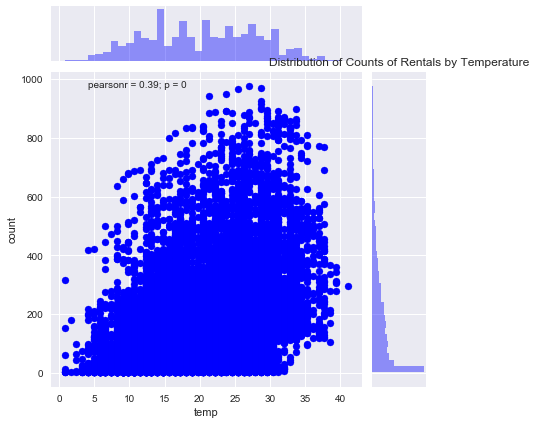

In [493]:
data = pd.DataFrame({"temp": train_data['temp'], "count": train_data['count']})
sns.jointplot(x="temp", y="count", data=data, color='b')
plt.title('Distribution of Counts of Rentals by Temperature')

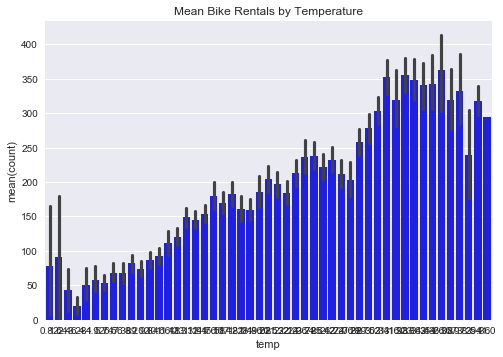

In [17]:
sns.barplot(x="temp", y = 'count', data=train_data, color = 'blue');
plt.title('Mean Bike Rentals by Temperature')

Temperature is the second most correlated variable to count (0.39). The nicer (higher) the temperature, the greater the average count for bike rentals for that temperature.

#### Relationship Between Windspeed and Count

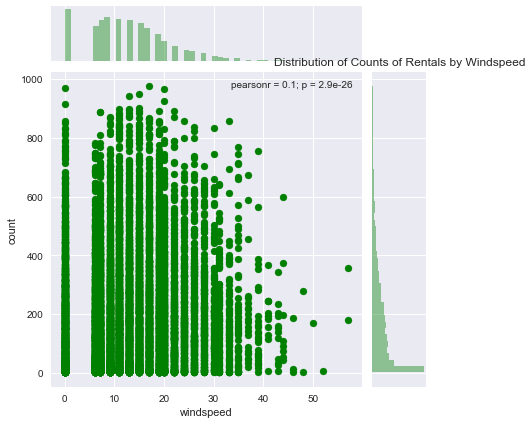

In [473]:
data = pd.DataFrame({"windspeed": train_data['windspeed'], "count": train_data['count']})
sns.jointplot(x="windspeed", y="count", data=data, color='g')
plt.title('Distribution of Counts of Rentals by Windspeed')

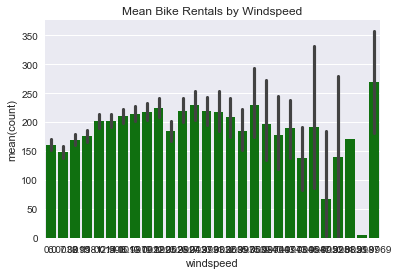

In [495]:
sns.barplot(x="windspeed", y = 'count', data=train_data, color = 'green');
plt.title('Mean Bike Rentals by Windspeed')

In [ ]:
train_data.groupby('hour')['count'].mean()

In [18]:
train_data.loc[train_data['windspeed']== max(train_data['windspeed'])]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
2755,2011-07-03 17:00:00,2,0,0,3,32.8,37.12,49,56.9969,181,177,358,2011,7,3,17,6
2756,2011-07-03 18:00:00,2,0,0,3,32.8,37.12,49,56.9969,74,107,181,2011,7,3,18,6


Windspeed has a correlation of (0.01) with count. It’s interesting that it does not have a negative correlation. We have over 1000 records with windspeed of 0, so I wonder if that one spike in rental counts at the upper end of the windspeed records influences the correlation, skews it positively even with greater winds. 


I looked up the records with the highest windspeed and it was 2 hours in the summer, July 3rd, 2011 from 5-7pm, with weather 3 (light snow, light rain+thunderstorm+ scattered clouds). Perhaps higher winds at 32.8 degrees Celcius (pretty hot) did not make for bad biking climate.

Unfortunately, because there are fewer records of rentals at higher windspeeds, those high counts play a bigger influence in average means for higher winds. 


#### Relationship Between Humidity and Count

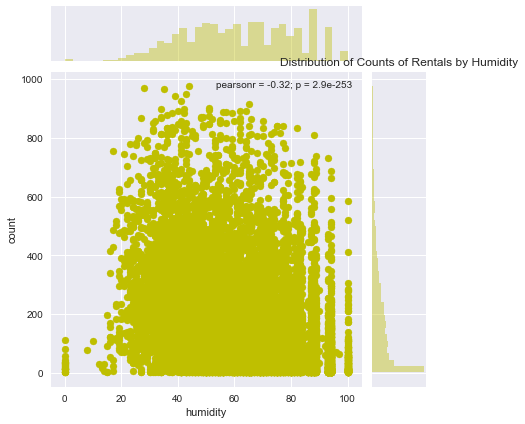

In [475]:
data = pd.DataFrame({"humidity": train_data['humidity'], "count": train_data['count']})
sns.jointplot(x="humidity", y="count", data=data, color='y')
plt.title('Distribution of Counts of Rentals by Humidity')

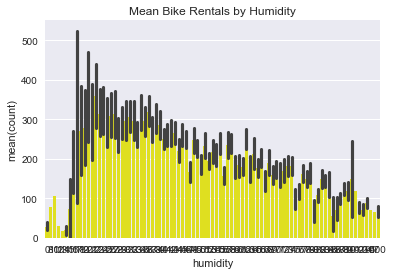

In [496]:
sns.barplot(x="humidity", y = 'count', data=train_data, color = 'yellow');
plt.title('Mean Bike Rentals by Humidity')

Humidity also has a pretty decent correlation with count (-0.32). The negative correlation makes sense to me as well. Interestingly, there is a slightly higher frequence of high humidity instances than I expected.

#### Relationship Between Workingday or Not and Count

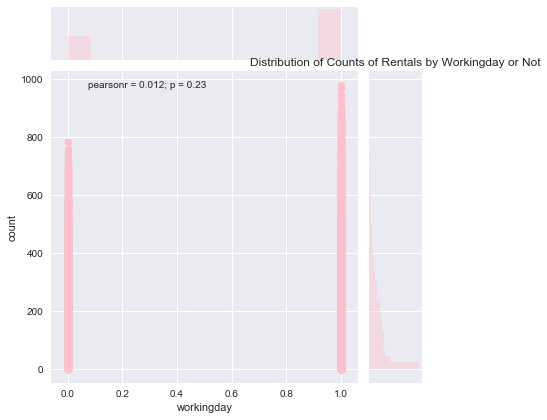

In [19]:
data = pd.DataFrame({"workingday": train_data['workingday'], "count": train_data['count']})
sns.jointplot(x="workingday", y="count", data=data, color='pink')
plt.title('Distribution of Counts of Rentals by Workingday or Not')

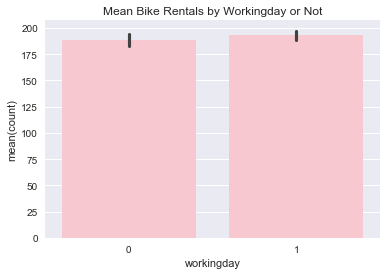

In [497]:
sns.barplot(x="workingday", y = 'count', data=train_data, color = 'pink');
plt.title('Mean Bike Rentals by Workingday or Not')

In [71]:
train_data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [69]:
train_data.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

Workingday doesn't have a good correlation (barely any) with count (0.01). In general, the average number of bikes rented during a working day is about that of the weekend/holiday.

It's interesting that more rentals were made during the hours of a workday, but then again there are more than twice as many working days as holidays/weekends. 

#### Relationship Between Weather and Count

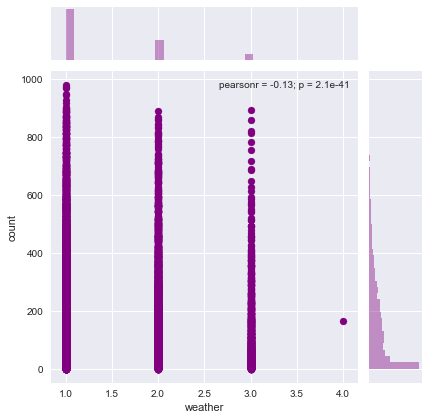

In [170]:
data = pd.DataFrame({"weather": train_data['weather'], "count": train_data['count']})
sns.jointplot(x="weather", y="count", data=data, color='purple')
plt.title('Distribution of Counts of Rentals by Weather')

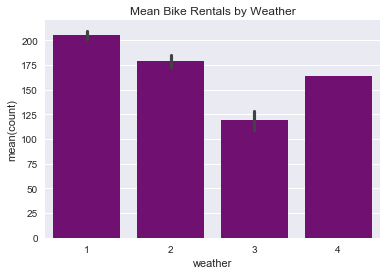

In [498]:
sns.barplot(x="weather", y = 'count', data=train_data, color = 'purple');
plt.title('Mean Bike Rentals by Weather')

In [56]:
train_data.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [57]:
train_data.loc[train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18


There is only one hour in which 164 apparent brave souls rented bikes when the weather was **4** or 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' which was recorded from 6-7pm on January 9th, 2012.

In [211]:
train_data.groupby('season')['temp'].describe()
#season 1 = spring
#season 2 = summer
#season 3 = fall
#season 4 = winter

season       
1       count    2686.000000
        mean       12.530491
        std         5.186492
        min         0.820000
        25%         9.020000
        50%        12.300000
        75%        16.400000
        max        29.520000
2       count    2733.000000
        mean       22.823483
        std         5.159616
        min         9.840000
        25%        18.860000
        50%        22.960000
        75%        26.240000
        max        38.540000
3       count    2733.000000
        mean       28.789111
        std         3.898157
        min        15.580000
        25%        26.240000
        50%        28.700000
        75%        31.160000
        max        41.000000
4       count    2734.000000
        mean       16.649239
        std         4.742176
        min         5.740000
        25%        13.120000
        50%        16.400000
        75%        20.500000
        max        30.340000
Name: temp, dtype: float64

It's surprising to see that on average, more bike rentals were made in weather 4 (harshest weather) than weather 1, but keep in mind there was only 1 hour recorded so it's only value is represented in the graph above.

It bothers me that there is this one odd exception for weather 4, so let's try to see why it's there and with a significant amount of bike shares.

One guess is that maybe a group of people had decided to rent bikes that day and the weather was predicted incorrectly?

**Another guess is that there might have been an cycling event on that day that people decided to partake in regardless of the weather situation. I tried looking up bike events that occurred on January 9th, 2012 in DC, but could not find a specific event - this doesn't discredit this hypothesis though**

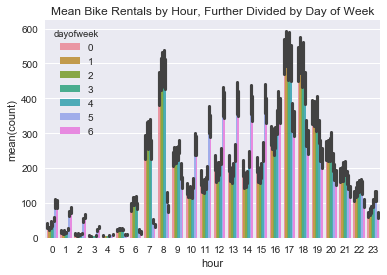

In [514]:
sns.barplot(x="hour", y = 'count', hue="dayofweek", data=train_data);
plt.title('Mean Bike Rentals by Hour of Day, Further Divided by Day of Week')

Although this graph is hard to read, we can see that when you look at bike rental counts with respect to the hour that's then split up by the day of the week, there are significant differences. Both these variables together will likely be a good predictor for counts!

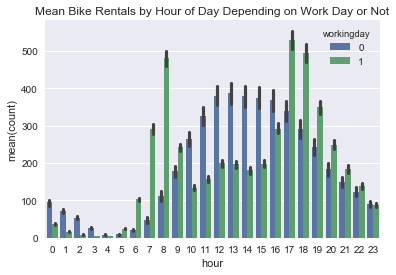

In [515]:
sns.barplot(x="hour", y = 'count', hue="workingday", data=train_data);
plt.title('Mean Bike Rentals by Hour of Day Depending on Work Day or Not')

I was curious to see how working day fits into the hour of the day. My assumption (a big assumption in that most of these people are working, and if they are - they work 9-5ish jobs) would be that in general, on workingdays, more people would rent bikes before or after work. On a holiday or the weekend, I expected that there would more activity mid day (no work). 

I think the graph tends to show something like that. Hours 10-16 (10am-5pm) have greater rental periods when it's NOT a working day (aka when it's the weekend/holiday).

I'm curious to know if the peaks for rentals during the hours of 6-8am and 5-8pm on workdays might correspond to people who bike to work?!

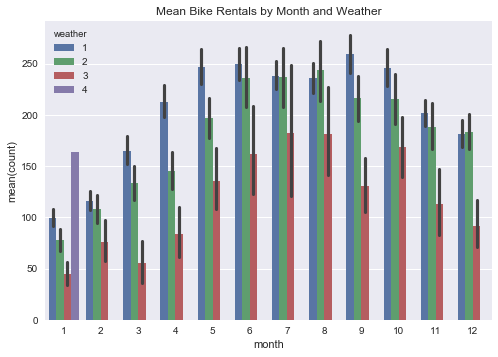

In [21]:
sns.barplot(x="month", y = 'count', hue="weather", data=train_data);
plt.title('Mean Bike Rentals by Month and Weather')

From earlier graphs, I could tell that both month and weather influenced bike rental counts, but I wanted to know if people went based on average weather for that month or if the data shows nuanced peaks for rentals BASED on different weather DURING that month.

In general, it looks like in each month (with the exception of January), weather 1 (nicest weather) seems to bring the most amount of rentals - which makes sense. Also, looking at weather 3, more people biked during weather 3 during the months of 5-9 (May to September) when the temperature tends to be hotter so weather 3 is nice is my guess, let's check in the next plot. 

This was a good sanity check to make sure that the people renting these bikes were in fact like most humans who prefer to ride in nice weather when possible.

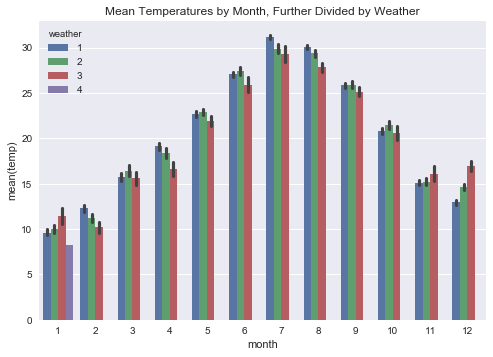

In [15]:
sns.barplot(x="month", y = 'temp', hue="weather", data=train_data);
plt.title('Mean Temperatures by Month, Further Divided by Weather')

I mentioned as a comment earlier from the result of graphing counts against months separated by weather that the temperature is likeley better for the months of 5-9, which corresponds to the summer months and why even weather 3 (not so great weather) has more rentals during these months than weather 3 during other months --> because better (higher) temperatures!

In [278]:
test_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


### MODIFYING + SAVING TRAIN_DATA, DEV_DATA, AND TEST_DATA

In [309]:
#if 'datetime' in train_data.columns:
    #train_data = train_data.drop('datetime',1)

#if 'casual' in train_data.columns:
    #train_data = train_data.drop('casual',1)
    
#if 'registered' in train_data.columns:
    #train_data = train_data.drop('registered',1)

    
#if 'datetime' in test_data.columns:
    #test_data = test_data.drop('datetime', 1)

In [16]:
#splitting train_data into train and dev
# I believe the scikit learn's train_test_split shuffles the data in this step 

from sklearn.cross_validation import train_test_split
train_data, dev_data = train_test_split(train_data, test_size = 0.2)

/Users/divyas/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
#creating the labels
train_labels = train_data['count']
dev_labels = dev_data['count']

In [18]:
print "The size of the training data set is: ", train_data.shape
print "The size of the dev data set is: ", dev_data.shape
print "The size of the test data set is: ", test.shape

The size of the training data set is:  (8708, 17)
The size of the dev data set is:  (2178, 17)
The size of the test data set is:  (6493, 14)


### EXPORTING TRAIN_DATA, DEV_DATA, AND TEST_DATA

In [19]:
# Export 'modern' datasets to CSV
train_data.to_csv('../TpT-BikeShareKaggle/FeatureEng_Data_Files/train_data.csv',sep=',')
dev_data.to_csv('../TpT-BikeShareKaggle/FeatureEng_Data_Files/dev_data.csv',sep=',')
test_data.to_csv('../TpT-BikeShareKaggle/FeatureEng_Data_Files/test_data.csv',sep=',')

In [20]:
train_labels = train_data["count"]
dev_labels = dev_data["count"]

Decision Trees: http://dni-institute.in/blogs/decision-tree-a-statistical-and-analytical-tool-for-effective-decisions/

Random Forests in R: http://dni-institute.in/blogs/random-forest-using-r-step-by-step-tutorial/